Basic Financial Formulas w/ Walmart (WMT) & Target (TGT)

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# need to specify the timeframe for analysis
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 31)

In [4]:
# load walmart and target data for the timeframe
WMT = data.DataReader("WMT", 'yahoo', start, end)
TGT = data.DataReader("TGT", 'yahoo', start, end)

In [6]:
# % change  
WMT['%-chg'] = WMT['Close'].pct_change()
TGT['%-chg'] = TGT['Close'].pct_change()

In [9]:
# log returns
WMT['Log returns'] = np.log(WMT['Close']/WMT['Close'].shift())
TGT['Log returns'] = np.log(TGT['Close']/TGT['Close'].shift())

In [11]:
WMT.head()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns
Date,,,,,,,,
2021-01-04,146.889999,144.279999,144.300003,146.529999,10727400.0,144.236282,NaN,NaN
2021-01-05,147.070007,144.490005,146.600006,145.750000,8832700.0,143.468491,-0.005323,-0.005337
2021-01-06,148.100006,145.009995,145.089996,146.660004,7306300.0,144.364258,0.006244,0.006224
2021-01-07,147.759995,146.039993,147.619995,146.649994,6846000.0,144.354401,-0.000068,-0.000068
2021-01-08,147.000000,145.809998,146.880005,146.630005,8159400.0,144.334732,-0.000136,-0.000136


In [13]:
TGT.head()

,High,Low,Open,Close,Volume,Adj Close,%-chg,Log returns
Date,,,,,,,,
2021-01-04,178.089996,174.119995,176.509995,177.630005,3463100.0,174.467789,NaN,NaN
2021-01-05,181.970001,176.429993,176.800003,180.369995,4843300.0,177.159027,0.015425,0.015308
2021-01-06,189.470001,180.110001,180.330002,188.919998,5610100.0,185.556778,0.047403,0.046313
2021-01-07,192.350006,189.169998,189.210007,191.100006,4226700.0,187.697998,0.011539,0.011473
2021-01-08,193.880005,190.809998,191.580002,193.600006,3321500.0,190.153503,0.013082,0.012997


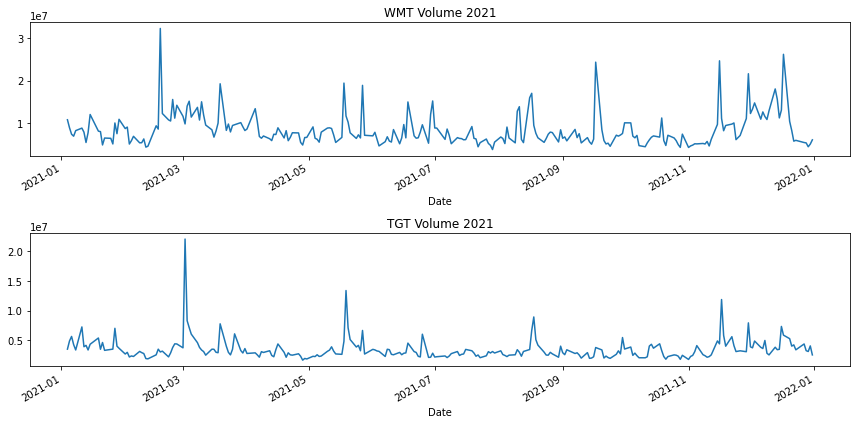

In [14]:
# combined plot of volume for Walmart & Target
fig, ax = plt.subplots(2)
WMT['Volume'].loc['2021-01-01':].plot(ax=ax[0], title="WMT Volume 2021", figsize=(12,6))
TGT['Volume'].loc['2021-01-01':].plot(ax=ax[1], title="TGT Volume 2021", figsize=(12,6))

fig.tight_layout()

In [15]:
# both companies are on the same scale of 1e7. However, Walmart has more shares available. Both WMT & TGT sold off in the first quarter, presumably due to sales declines after the holidays. 

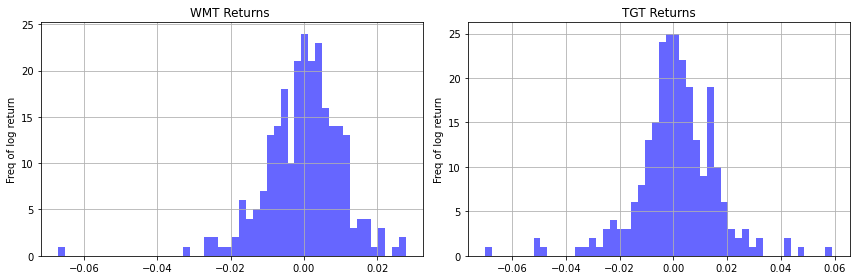

In [16]:
fig, ax = plt.subplots(1,2)
WMT['Log returns'].hist(ax=ax[0], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[0].set_ylabel("Freq of log return")
ax[0].set_title("WMT Returns ")

#  Returns
TGT['Log returns'].hist(ax=ax[1], bins=50, alpha=0.6, color='b', figsize=(12,4))
ax[1].set_ylabel("Freq of log return")
ax[1].set_title("TGT Returns")

fig.tight_layout()

In [17]:
# WMT seems to be skewed right, however, the mean for both companies are straddling zero. the value on WMT all by itself on the left is most likely an outlier, one or two days where the shares were bought up like hot cakes. 

In [20]:
WMT['Log returns'].std()

0.010566097093939207

In [21]:
TGT['Log returns'].std()

0.014964775897820567

In [22]:
WMT_volatility = WMT['Log returns'].std()*np.sqrt(252)
WMT_volatility

0.16773159143475252

In [23]:
TGT_volatility = TGT['Log returns'].std()*np.sqrt(252)
TGT_volatility

0.2375584527086793

In [ ]:
# Target is more volitile. Goodnight. 